# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_data = pd.read_csv("data/Speed Dating Data.csv")
df_data.shape

(8378, 195)

In [24]:
df_las = df_data.fillna(df_data.mean())
df_las.shape

(8378, 195)

In [4]:
cols = ['iid', 'pid', 'match','gender',
        'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']


df_selected = df_data.loc[:, cols]

# Separate dataframe into male and female.
df_male = df_selected.loc[ df_selected['gender'] == 1 ]
df_female = df_selected.loc[ df_selected['gender'] == 0 ]

# Select columns we want from female's dataframe.
attr3 = ['iid', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',  'amb3_1']
df_female = df_female.loc[:, attr3]

# Drop duplicated Index from female's dataframe.
df_female.drop_duplicates('iid', inplace=True)

# Let's make dataframe for matching. (empty yet)
df_match = pd.DataFrame( data = None, columns = cols + ['attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o'] )
index = 0

# Let's fill each rows of dataframe for matching.
for m_index, m_row in df_male.iterrows() :
    pid = m_row['pid']
    
#     Find partner id in female group corresponding to each row.
    for f_index, f_row in df_female.iterrows() :
        if pid == f_row['iid'] :
            
#           Extract values from each row of dataframes.
            values = list(m_row.values) + list(f_row.values[1:])
    
#           Fill a row of match dataframe
            df_match.loc[index] = values
            index += 1
#             print(index)
            
            break
#     if index ==  :
#         break
    
# df_match



In [5]:
new_data=df_match.dropna(subset=['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o'
                                ,'iid','pid','match','gender'])

# Learning with basic separation

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(new_data, test_size=0.25,random_state=0)

X=['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o']
Y=['match']


#print(train)
#print(test)

train_X=train[X]
train_Y=train['match']

test_X=test[X]
test_Y=test['match']

features_one = train_X.values
target = train_Y.values


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df_las, test_size=0.25,random_state=0)
Y = ['match']
X = train.columns.tolist()
X.remove('income')
X.remove('field')
X.remove('match')
X.remove('career')
X.remove('zipcode')
X.remove('from')
X.remove('undergra')
X.remove('mn_sat')
X.remove('tuition')
X.remove('like')
X.remove('like_o')
X.remove('dec')
X.remove('dec_o')
# print(X)

train_X = train[X]
train_Y = train[Y]

# print(train_Y)

test_X = test[X]
test_Y = test[Y]

features_one = train_X.values
target = train_Y.values

NameError: name 'df_las' is not defined

In [137]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha =0.001)
lasso.fit(features_one,target)

# lasso.predict(test_X)
print(lasso.score(test_X, test_Y))
print(lasso.score(features_one, target))
print(np.sum(lasso.coef_ != 0))
cols = [(lasso.coef_ != 0)]

indexs = []
for i in range(0, len(cols[0])) :
    if cols[0][i] == True :
        indexs.append(i)
        print( X[i] )
print(indexs)

0.21539269913394385
0.25614374053751476
153
iid
id
idg
condtn
wave
round
position
positin1
order
partner
pid
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
prob_o
met_o
age
field_cd
imprace
imprelig
goal
date
go_out
career_c
sports
tvsports
exercise
museums
art
hiking
clubbing
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
sinc3_1
fun3_1
intel3_1
amb3_1
sinc5_1
fun5_1
amb5_1
attr
sinc
intel
fun
amb
shar
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
fun3_s
amb3_s
satis_2
attr7_2
intel7_2
amb7_2
shar7_2
attr1_2
sinc1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb4_2
shar4_2
attr2_2
sinc2_2
intel2_2
fun2_2
amb2_2
attr3_2
sinc3_2
intel3_2
amb3_2
attr5_2
sinc5_2
amb5_2
you_call
them_cal
numdat_3
attr1_3
sinc1_3
intel1_3

C:\Users\cnlab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### 1. Decision Tree

In [27]:
tree_model = DecisionTreeClassifier()
clf = tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)

accuracy = metrics.accuracy_score(dt_prediction, test_Y)
print('The accuracy of the Decision Tree is',accuracy)

clf.predict(test_X)

The accuracy of the Decision Tree is 0.734313725490196


array([1., 0., 0., ..., 0., 1., 0.])

### 2. SVM - linear

In [9]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(features_one, target)

accuracy = svc.score(test_X, test_Y)

print('The accuracy of the SVM_linear is',accuracy)

svc.predict(test_X)

The accuracy of the SVM_linear is 0.8313725490196079


array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
h = .02
C = 1.0
x_min, x_max = features_one[:,0].min() -1, features_one[:,0].max()+1
y_min, y_max = features_one[:,1].min() -1, features_one[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paried, alpha=0.8)

plt.scatter(train_X[:,0], X[:,1],c=y, cmap = plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: X.shape[1] = 2 should be equal to 10, the number of features at training time

### 3. SVM - rbf

In [11]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')
svc_r.fit(features_one, target)

accuracy = svc_r.score(test_X, test_Y)

print('The accuracy of the SVM_rbf is',accuracy)

svc_r.predict(test_X)

The accuracy of the SVM_rbf is 0.8343137254901961


array([0., 0., 0., ..., 0., 0., 0.])

### 4. KNN

In [12]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(features_one, target)

accuracy = knn.score(test_X, test_Y)

print('The accuracy of the KNN is',accuracy)

knn.predict(test_X)

The accuracy of the KNN is 0.8196078431372549


array([0., 0., 0., ..., 0., 0., 0.])

### 5. Grid Search

In [22]:
from sklearn import svm, grid_search
gammas = np.logspace(-6,-1,10)
svc_g = svm.SVC()
clf = grid_search.GridSearchCV(estimator=svc_g, param_grid=dict(gamma = gammas), n_jobs=-1)
clf.fit(features_one, target)

accuracy = clf.score(test_X, test_Y)

print('The accuracy of the Grid-search is',accuracy)

C:\Users\cnlab\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\cnlab\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The accuracy of the Grid-search is 0.8554360812425329


In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.000001, max_iter=1000000)
lasso.fit(features_one,target)

# lasso.predict(test_X)
print(lasso.score(test_X, test_Y))
print(lasso.score(features_one, target))
print(np.sum(lasso.coef_!=0))

-0.0014306086590039069
0.014182995038893866
10


# Learning with KFold

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

kf = KFold(n_splits=4, random_state=1)

new_data = shuffle(new_data)
# new_data.head()

train_1, test_1 = train_test_split(new_data, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

### 1. Decision Tree

In [34]:
model=DecisionTreeClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)

print(model.score(test_X,test_Y))
print(metrics.accuracy_score(prediction, test_Y))
model.predict(test_X)

0.7303921568627451
0.7303921568627451


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0.

### 2. SVM - linear

In [39]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0)

for i, (train, test) in enumerate(kf.split(train_1)):
#     print(test)
    train_data_X = np.array(data_X)[train]
#     print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc.fit(train_data_X, train_data_Y)

accuracy = svc.score(test_X, test_Y)
print(accuracy)
svc.predict(test_X)

0.8419117647058824


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 3. SVM - rbf

In [17]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(accuracy)

svc_r.predict(test_X)

0.8480392156862745


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 4. KNN

In [35]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    knn.fit(train_data_X, train_data_Y)

accuracy = knn.score(test_X, test_Y)

print('The accuracy of the KNN is',accuracy)

knn.predict(test_X)

The accuracy of the KNN is 0.8308823529411765


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 5. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    clf.fit(train_data_X, train_data_Y)
    
accuracy = clf.score(test_X, test_Y)
print(clf.score(test_X, test_Y))

clf.predict(test_X)

0.8272058823529411


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Preprocessing fill with mean

In [16]:
df_match.isnull().sum()

iid           0
pid           0
match         0
gender        0
attr3_1       0
sinc3_1       0
fun3_1        0
intel3_1      0
amb3_1        0
attr3_1_o     0
sinc3_1_o     0
fun3_1_o      0
intel3_1_o    0
amb3_1_o      0
dtype: int64

In [4]:
df_fill = df_match
df_fill['attr3_1'].fillna(df_fill['attr3_1'].mean(), inplace = True)
df_fill['sinc3_1'].fillna(df_fill['sinc3_1'].mean(), inplace = True)
df_fill['fun3_1'].fillna(df_fill['fun3_1'].mean(), inplace = True)
df_fill['intel3_1'].fillna(df_fill['intel3_1'].mean(), inplace = True)
df_fill['amb3_1'].fillna(df_fill['amb3_1'].mean(), inplace = True)
df_fill['attr3_1_o'].fillna(df_fill['attr3_1_o'].mean(), inplace = True)
df_fill['sinc3_1_o'].fillna(df_fill['sinc3_1_o'].mean(), inplace = True)
df_fill['fun3_1_o'].fillna(df_fill['fun3_1_o'].mean(), inplace = True)
df_fill['intel3_1_o'].fillna(df_fill['intel3_1_o'].mean(), inplace = True)
df_fill['amb3_1_o'].fillna(df_fill['amb3_1_o'].mean(), inplace = True)
df_fill.isnull().sum()

iid           0
pid           0
match         0
gender        0
attr3_1       0
sinc3_1       0
fun3_1        0
intel3_1      0
amb3_1        0
attr3_1_o     0
sinc3_1_o     0
fun3_1_o      0
intel3_1_o    0
amb3_1_o      0
dtype: int64

In [13]:
kf = KFold(n_splits=4, random_state=1)

model=DecisionTreeClassifier()

df_fill = shuffle(df_fill)

train_1, test_1 = train_test_split(df_fill, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

0.7335722819593787


In [14]:
from sklearn import svm
svc_r = svm.SVC(kernel='linear')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(svc_r.score(test_X, test_Y))

0.8267622461170848


In [15]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(svc_r.score(test_X, test_Y))

0.8255675029868578


# Preprocessing with 최빈값

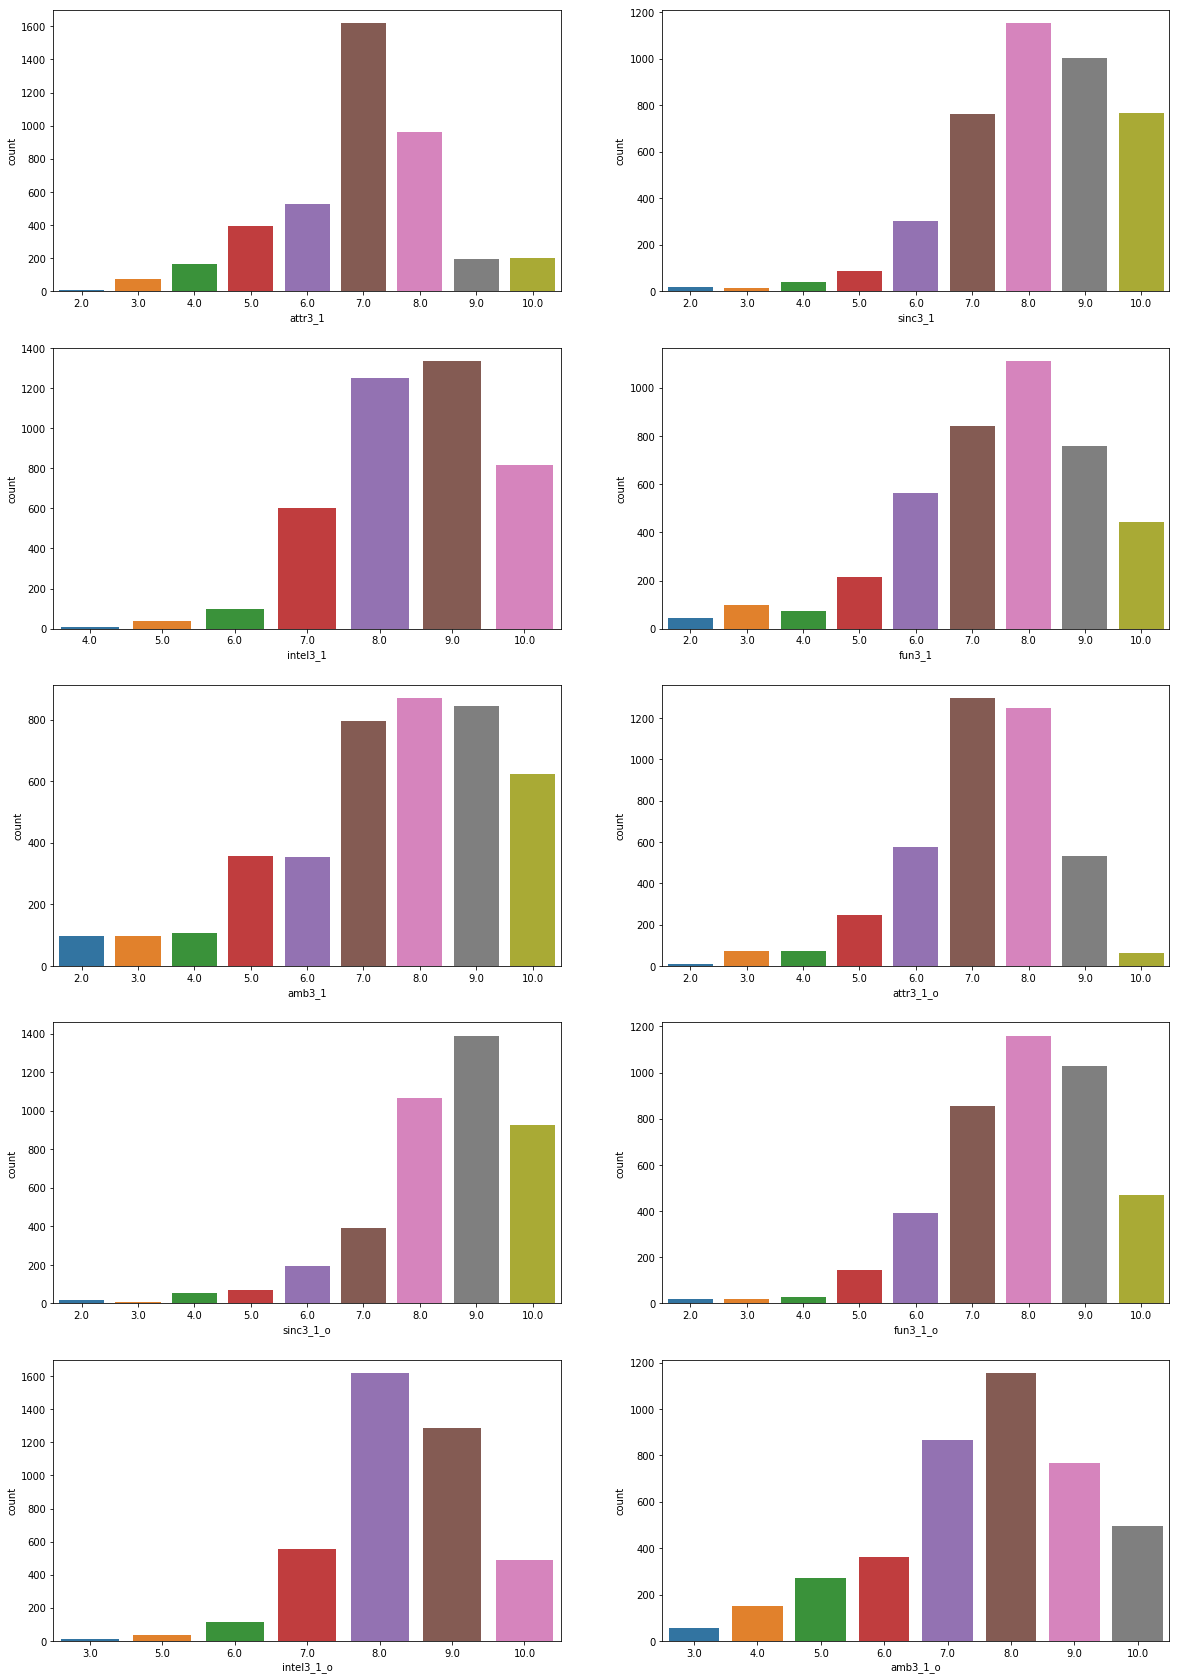

In [9]:
f, ax = plt.subplots(5, 2, figsize=(20,30))
sns.countplot('attr3_1',data=df_match, ax=ax[0,0])
sns.countplot('sinc3_1',data=df_match, ax=ax[0,1])
sns.countplot('intel3_1',data=df_match, ax=ax[1,0])
sns.countplot('fun3_1',data=df_match, ax=ax[1,1])
sns.countplot('amb3_1',data=df_match, ax=ax[2,0])
sns.countplot('attr3_1_o',data=df_match, ax=ax[2,1])
sns.countplot('sinc3_1_o',data=df_match, ax=ax[3,0])
sns.countplot('fun3_1_o',data=df_match, ax=ax[3,1])
sns.countplot('intel3_1_o',data=df_match, ax=ax[4,0])
sns.countplot('amb3_1_o',data=df_match, ax=ax[4,1])

In [ ]:
f, ax = plt.subplots(5, 2, figsize=(20,30))
sns.countplot('attr3_1',data=df_match, ax=ax[0,0])
sns.countplot('sinc3_1',data=df_match, ax=ax[0,1])
sns.countplot('intel3_1',data=df_match, ax=ax[1,0])
sns.countplot('fun3_1',data=df_match, ax=ax[1,1])
sns.countplot('amb3_1',data=df_match, ax=ax[2,0])
sns.countplot('attr3_1_o',data=df_match, ax=ax[2,1])
sns.countplot('sinc3_1_o',data=df_match, ax=ax[3,0])
sns.countplot('fun3_1_o',data=df_match, ax=ax[3,1])
sns.countplot('intel3_1_o',data=df_match, ax=ax[4,0])
sns.countplot('amb3_1_o',data=df_match, ax=ax[4,1])

In [11]:
df_most = df_match
df_most.isnull().sum()

iid            0
pid            0
match          0
gender         0
attr3_1       38
sinc3_1       38
fun3_1        38
intel3_1      38
amb3_1        38
attr3_1_o     67
sinc3_1_o     67
fun3_1_o      67
intel3_1_o    67
amb3_1_o      67
dtype: int64

In [12]:
df_most['attr3_1'].fillna(7, inplace = True)
df_most['sinc3_1'].fillna(9, inplace = True)
df_most['intel3_1'].fillna(8, inplace = True)
df_most['fun3_1'].fillna(8, inplace = True)
df_most['amb3_1'].fillna(8, inplace = True)
df_most['attr3_1_o'].fillna(7, inplace = True)
df_most['sinc3_1_o'].fillna(8, inplace = True)
df_most['intel3_1_o'].fillna(8, inplace = True)
df_most['fun3_1_o'].fillna(9, inplace = True)
df_most['amb3_1_o'].fillna(8, inplace = True)

df_most.isnull().sum()

iid           0
pid           0
match         0
gender        0
attr3_1       0
sinc3_1       0
fun3_1        0
intel3_1      0
amb3_1        0
attr3_1_o     0
sinc3_1_o     0
fun3_1_o      0
intel3_1_o    0
amb3_1_o      0
dtype: int64

In [13]:
kf = KFold(n_splits=4, random_state=1)

model=DecisionTreeClassifier()

df_most = shuffle(df_most)

train_1, test_1 = train_test_split(df_most, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

0.7502986857825568


In [71]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(svc_r.score(test_X, test_Y))

0.8279569892473119


### Ridge

In [26]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 10)

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    reg.fit(train_data_X, train_data_Y)

# reg.predict(test_X)

reg.score(test_X, test_Y)

0.0028533527079203096

In [25]:
reg_c = linear_model.RidgeCV(alphas=[0.1,1.0,10.0])

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    reg_c.fit(train_data_X, train_data_Y)
    
reg_c.alpha_

10.0

In [16]:
from sklearn.linear_model import Lasso
lasso = Lasso()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    lasso.fit(train_data_X, train_data_Y)
    
print(lasso.score(test_X, test_Y))
print(np.sum(lasso.coef_ != 0))

-0.003353698618583367
0


In [19]:
lasso1 = Lasso(alpha = 0.0001)

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    lasso1.fit(train_data_X, train_data_Y)
    
print(lasso1.score(test_X, test_Y))
print(np.sum(lasso1.coef_ != 0))

-0.005604969529834136
10


In [34]:
lasso2 = Lasso(alpha = 0.000000001)

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    lasso2.fit(train_data_X, train_data_Y)

print(lasso2.score(train_data_X, train_data_Y))
print(lasso2.score(test_X, test_Y))
print(np.sum(lasso2.coef_ != 0))

0.011517191391413382
-0.005622032993576331
10
